In [14]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import sklearn.tree as tree
import sklearn.metrics as met
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
data = pd.read_csv("datasets/decisiontree_ch6.csv")
data

,ID,mesin,bangku,penggerak,label
0,1,bensin,4,depan,sedan
1,2,bensin,2,depan,sedan
2,3,bensin,8,belakang,minibus
3,4,diesel,6,depan,minibus
4,5,bensin,5,belakang,minibus
5,6,diesel,8,belakang,minibus
6,7,diesel,8,belakang,minibus
7,8,bensin,4,depan,sedan
8,9,diesel,7,belakang,minibus
9,10,bensin,4,depan,sedan


In [16]:
codes = {
    "mesin": {"bensin":0, "diesel":1},
    "penggerak": {"depan":0, "belakang":1}
}
data.replace(codes, inplace=True)
data.head(5)

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [17]:
X = data.iloc[:, 1:4]
y = data["label"]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
model = tree.DecisionTreeClassifier(criterion="entropy") # "entropy" atau "gini"
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
# a = np.array([[0], [5], [0]]).reshape(1,-1)
y_pred = model.predict(X_test)
print(y_pred, y_test)

['sedan' 'minibus' 'minibus' 'minibus' 'sedan' 'sedan' 'sedan' 'sedan'] 10      sedan
4     minibus
34    minibus
3     minibus
1       sedan
29      sedan
14      sedan
39      sedan
Name: label, dtype: object


In [6]:
acc = met.accuracy_score(y_test, y_pred)
print(acc)

0.875


<AxesSubplot:>

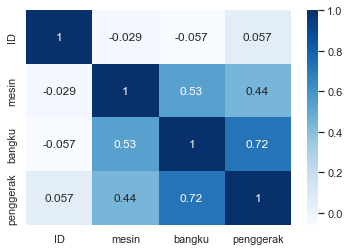

In [8]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")

# CEK DENGAN DIAGRAM POHON VISUALISASI

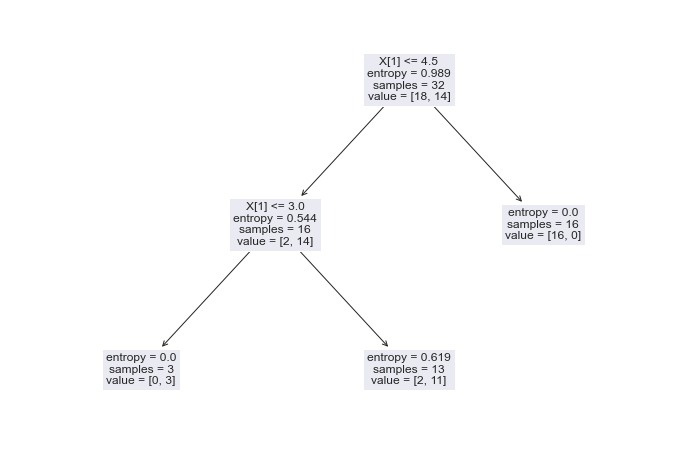

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
plt.rcParams["figure.dpi"] = 71
tree.plot_tree(model, fontsize=12)
plt.show() # Value  array 0 = Minibus, 1 = Sedan